In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from bearing_walls import *
import random
from colored_space import *
from external_wall_contours import *
from colored_space import *
from textual_layer import *

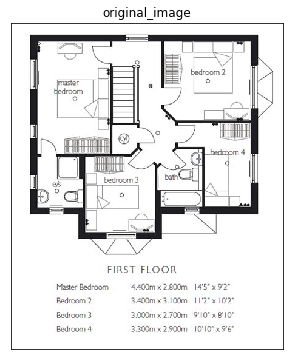

In [18]:
#read the image
img_path = "../Data/floorplans_VOA/DFirstFloor.jpg"
original_image = cv2.imread(img_path)

plt.figure(figsize = (60,6))
plt.imshow(original_image, cmap='gray')
plt.title('original_image')
plt.xticks([]), plt.yticks([])
plt.show()

In [19]:
def get_external_bearing_walls(img):

    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    ret, th = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
#     ret, th2 = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    plt.figure(figsize = (60,6))
    plt.imshow(th, cmap='gray')
    plt.title('THRESH_OTSU and binary inv')
    plt.xticks([]), plt.yticks([])
    plt.show()
    
#     plt.figure(figsize = (60,6))
#     plt.imshow(th2, cmap='gray')
#     plt.title('THRESH_OTSU and binary')
#     plt.xticks([]), plt.yticks([])
#     plt.show()

    kernel1 = np.ones((5, 5), np.uint8)  # square image kernel used for erosion
    erode1 = cv2.erode(th, kernel1, iterations=2)
    # cv2.imshow("erode1", erode1)

    kernel1 = np.ones((5, 5), np.uint8)  # square image kernel used for erosion
    dilate1 = cv2.dilate(erode1, kernel1, iterations=2)
    # cv2.imshow("dilate1", dilate1)

    return dilate1


In [20]:
def get_completed_external_bearing_walls(input_img):

    image = get_external_bearing_walls(input_img)
    
    plt.figure(figsize = (60,6))
    plt.imshow(image, cmap='gray')
    plt.title('external_walls')
    plt.xticks([]), plt.yticks([])
    plt.show()

    # fill horizontal gaps
    selem_horizontal = morphology.rectangle(1, 50)
    img_filtered = morphology.closing(image, selem_horizontal)

    # fill vertical gaps
    selem_vertical = morphology.rectangle(80, 1)
    img_filtered = morphology.closing(img_filtered, selem_vertical)

    # plt.imshow(img_filtered, cmap="gray")
    # plt.gca().axis("off")
    # plt.show()

    return img_filtered

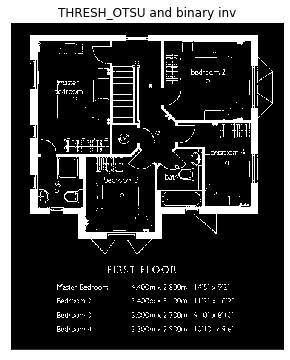

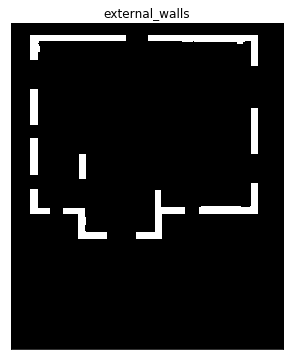

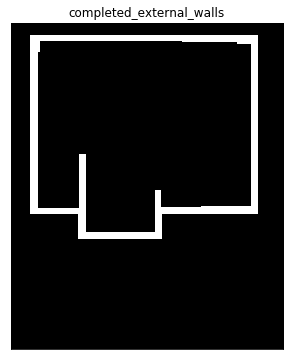

In [21]:
completed_external_walls = get_completed_external_bearing_walls(original_image)
_, completed_external_walls_inv = cv2.threshold(completed_external_walls, 200, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize = (60,6))
plt.imshow(completed_external_walls, cmap='gray')
plt.title('completed_external_walls')
plt.xticks([]), plt.yticks([])
plt.show()

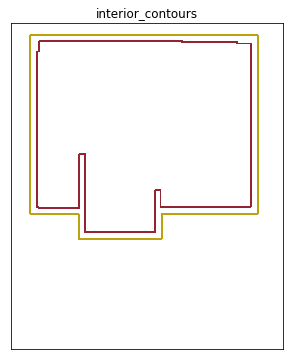

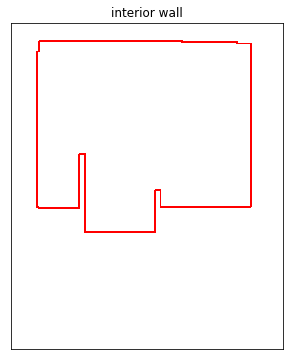

In [22]:
a,b,c = original_image.shape
interior_contours = np.zeros([a, b, c], np.uint8)
interior_contours.fill(255)

contours, hierachy = cv2.findContours(completed_external_walls, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

for c in sorted_contours:
    cv2.drawContours(interior_contours, [c], -1,
                     (random.randrange(0, 255), random.randrange(0, 256), random.randrange(0, 255)), 2)

a,b,c = original_image.shape
bi = np.zeros([a, b, c], np.uint8)
bi.fill(255)

plt.figure(figsize = (60,6))
plt.imshow(interior_contours, cmap='gray')
plt.title('interior_contours')
plt.xticks([]), plt.yticks([])
plt.show()

cv2.drawContours(bi, [sorted_contours[1]], -1, (255, 0, 0), 2)
plt.figure(figsize = (60,6))
plt.imshow(bi, cmap='gray')
plt.title('interior wall')
plt.xticks([]), plt.yticks([])
plt.show()




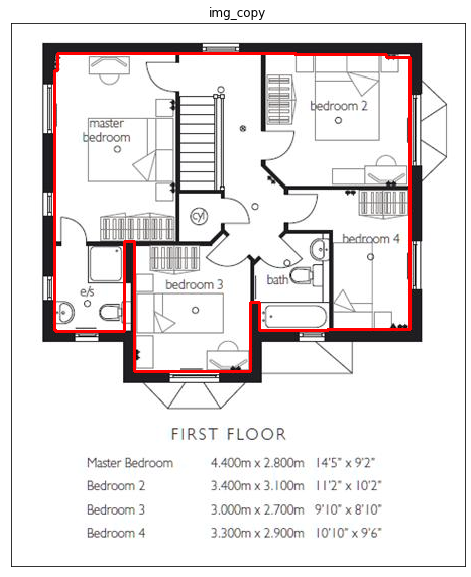

In [23]:
img_copy = original_image.copy()
cv2.drawContours(img_copy, [sorted_contours[1]], -1, (255, 0, 0), 2)

plt.figure(figsize = (60,10))
plt.imshow(img_copy, cmap='gray')
plt.title('img_copy')
plt.xticks([]), plt.yticks([])
plt.show()


In [24]:
# Area Calcuation:
area_in_px_sq = cv2.contourArea(sorted_contours[1])

area_in_cm_sq = area_in_px_sq * 0.0007000434
area_in_ft_sq = area_in_cm_sq * 0.0010763

# display area
print("\nArea in pixel-square:")
print(area_in_px_sq)

print("\nArea in cm square")
print(area_in_cm_sq)


Area in pixel-square:
99778.5

Area in cm square
69.8492803869
